# **Project : Life Expectancy Prediction**

**Shivshankar Ghyar** [202201040031]

**Tejas Gophane**    [202201040063]

**Srushty Dhamange**  [202201070016]

## **MINI PROJECT**

## **Research Papers & Dataset**
#### Paper1:https://www.researchgate.net/publication/356235215_Life_Expectancy_Prediction_Analysis_using_ML


####  Dataset Link :https://drive.google.com/file/d/1W7KsdziV2oNxhjM-3nzEOzrOj3NiKtf1/view?usp=sharing

### Feature Engineering ,Classification & Regression Models Comparisions : https://colab.research.google.com/drive/1mynShkuvdNPegpUSbEYvVfybWGdYEzz0?usp=sharing





### **Problem Statement :** Can we build a machine learning model that predicts life expectancy more accurately by considering factors like healthcare quality, education levels, economic conditions, and social welfare services?

### **Step1: Load the Dataset**

In [18]:
# EDA Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Read Data into a Dataframe
#df = pd.read_csv('/content/drive/MyDrive/College/TY_BTech/AIML/PROJECT1_SEM5/FInalProject/life.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/life.csv')
#df=pd.read_csv('life.csv')

In [21]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### **Step2: Data Analysis**

In [22]:
# Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [23]:
df.tail()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [24]:

df.shape

(2938, 21)

In [25]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [26]:
df.dtypes

,0
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64
BMI,float64


In [27]:
x_ex = np.array(['Developing','Developed','Developing','Developed'])

for i in x_ex:
    if i == 'Developed':
        print(1)
    else:
        print(0)

0
1
0
1


In [28]:
df1 = df

### **Step3: Feature Encoding**

In [29]:
# create dummy/indicator variables from categorical data in the DataFrame df1
pd.get_dummies(df1)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,True
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,True
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,True
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,True


In [30]:
# Replace T,F with 1,0
df1.replace({
    'Developed':1,
    'Developing':0
},inplace=True)

<ipython-input-30-081ad27807d4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({


### **Step4: Handling Missing Values**

In [31]:
# Let us check our correlation
df1.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
# count the number of missing values in each column
print(df1.isnull().sum())

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

Handling missing values


In [34]:
import numpy as np
def impute_missing_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype == 'object':
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                median = df[column].median()
                df[column] = df[column].fillna(median)
                col_range = df[column].max() - df[column].min()
                if col_range > 0:
                    df[column] = df[column].fillna(median)
                    num_missing = df[column].isnull().sum()
                    random_values = np.random.randint(df[column].min(), df[column].max(), size=num_missing)
                    df.loc[df[column].isnull(), column] = random_values
    return df

In [35]:
# list of numerical columns with missing values
num_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ',
            'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
            ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources',
            'Schooling']

# loop over the numerical columns and fill missing values with random imputation
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median = df[col].median()
        impute_missing_values(df)

In [36]:
print(df.isnull().sum())


Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


### **Step5: Feature Selection**

In [38]:
# To select and retain only the relevant features in a dataset by removing features with variance below a specified threshold.
from sklearn.feature_selection import VarianceThreshold

# Create an instance of VarianceThreshold with a threshold value
threshold = 0.01  # Adjust the threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(df)

# Get the indices of the non-constant features
relevant_features = selector.get_support(indices=True)

# Select the relevant features from your dataset
df_relevant = df.iloc[:, relevant_features]

In [39]:
correlation_matrix = df_relevant.corr().abs()

# Create a mask to ignore the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
masked_correlation = correlation_matrix.mask(mask)

# Find highly correlated features with a correlation threshold
correlation_threshold = 0.8  # Adjust the threshold as needed
highly_correlated_features = np.where(masked_correlation > correlation_threshold)

# Print the highly correlated feature pairs
for i, j in zip(highly_correlated_features[0], highly_correlated_features[1]):
    print(f"Features {df_relevant.columns[i]} and {df_relevant.columns[j]} are highly correlated.")

Features under-five deaths  and infant deaths are highly correlated.
Features GDP and percentage expenditure are highly correlated.
Features  thinness 5-9 years and  thinness  1-19 years are highly correlated.


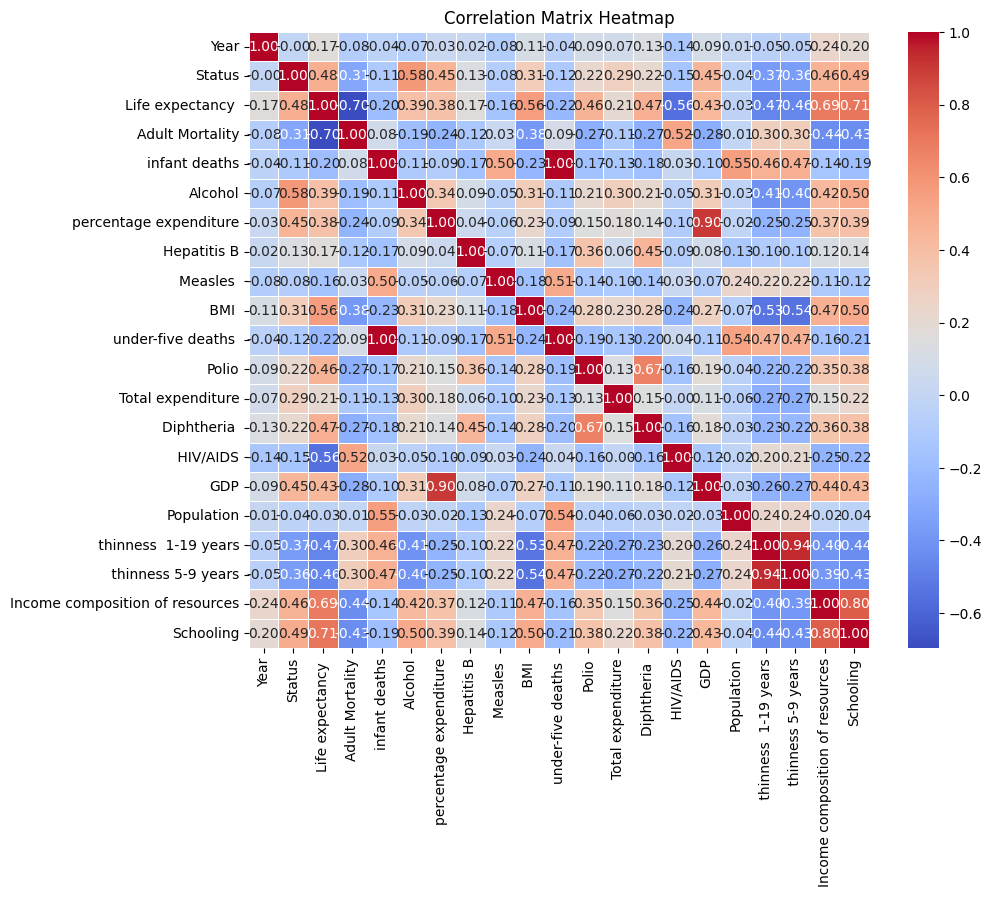

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df_relevant.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

We drop "infant deaths" due to its high correlation with "under-five deaths" (1.0).

 We also drop "percentage expenditure" as it shows a high correlation (0.9) with "GDP".

 Furthermore, we choose to drop "thinness 5-9 years" because of its high correlation (0.9) with "thinness 1-19 years".

 By dropping these features, you can reduce redundancy, mitigate multicollinearity issues, and improve the model's interpretability without sacrificing significant information.

In [41]:
# Drop the specified columns
df = df.drop(['infant deaths', 'percentage expenditure', ' thinness 5-9 years'], axis=1)

In [42]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,2014,0,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,2013,0,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,2012,0,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,2011,0,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


### **Step6: PreProcess Model Training**

In [43]:
import pandas as pd

# Separate the feature matrix (X)
X = df.drop(columns=['Life expectancy '])

# Extract the target variable (y)
y = df['Life expectancy ']

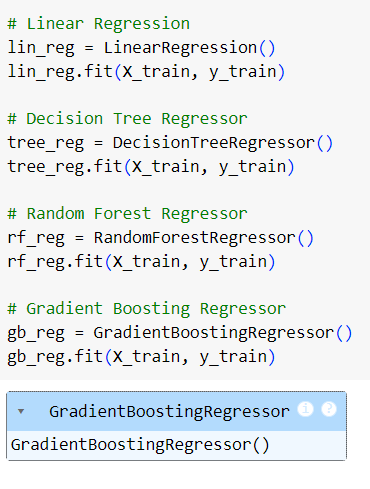

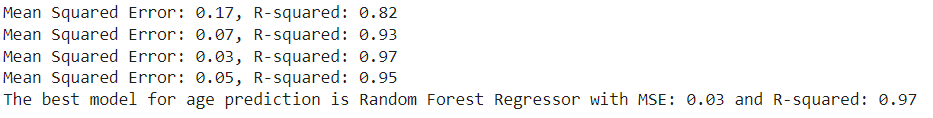

### **Test-Train-Split**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## **Step7:Model Training**

### **We have Considering RandomForestRegressor as our Final Model based on diff Model Performances [Accuracy precision & Training ]**

In [46]:
# Choose a regression model (e.g., Linear Regression)
model = RandomForestRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
# Predict the target variable for the validation set
y_val_pred = model.predict(X_val)

### **Step8:Evaluating Regression Model**

In [48]:
# Evaluate the model performance on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r_squared_val = model.score(X_val, y_val)

# Print the evaluation metrics on the validation set
print("Validation Set:")
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r_squared_val)

Validation Set:
Mean Squared Error: 3.1452861292517014
Root Mean Squared Error: 1.77349545509756
R-squared: 0.9676082310365448


In [49]:
# Predict the target variable for the testing set
y_test_pred = model.predict(X_test)

In [50]:
# Evaluate the model performance on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r_squared_test = model.score(X_test, y_test)

# Print the evaluation metrics on the testing set
print("Testing Set:")
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r_squared_test)

Testing Set:
Mean Squared Error: 4.104354571428565
Root Mean Squared Error: 2.0259206725408982
R-squared: 0.9541969414467395


### **Step9: Analyse the Prediction**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


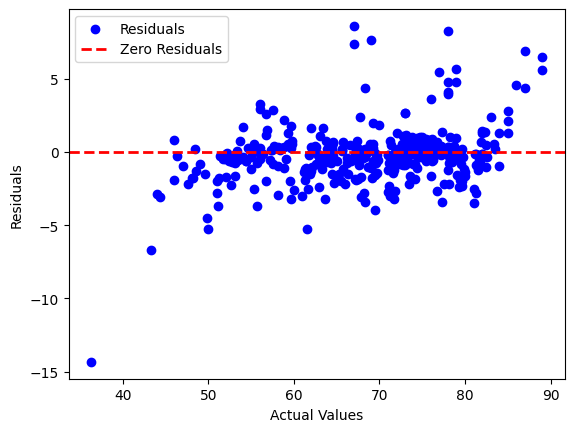

In [53]:
# Combine the training and validation sets
X_trainval = np.concatenate((X_train, X_val), axis=0)
y_trainval = np.concatenate((y_train, y_val), axis=0)

# Create the normal linear regression model
final_model = RandomForestRegressor()

# Train the final model on the combined training and validation sets
final_model.fit(X_trainval, y_trainval)

# Predict the target variable for the test set
y_pred = final_model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [54]:
lmpredictions = final_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


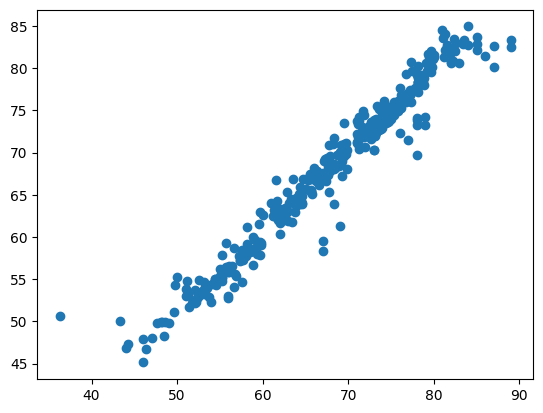

In [55]:
plt.scatter(y_test,lmpredictions)

<ipython-input-56-a1760054a9c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-lmpredictions),bins=50);


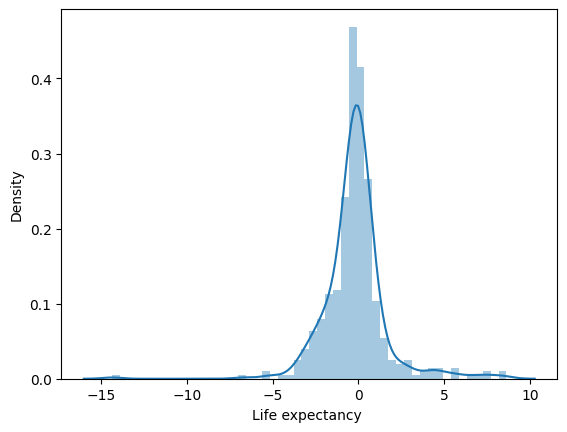

In [56]:
sns.distplot((y_test-lmpredictions),bins=50);

In [60]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [61]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [62]:
import numpy as np

# Create a new input data point
new_data = np.array([[2015, 0, 263.0, 0.01, 65.0, 1154, 19.1, 83, 6.0, 8.16, 65.0, 0.1, 584.259210, 33736494.0, 17.2, 0.479, 10.1]])

# Make a prediction
prediction = loaded_model.predict(new_data)
print(prediction)

[64.552]


In [63]:
new_data = np.array([[2002, 1, 271.0, 0.01, 62.0, 492, 18.6, 0, 58.0, 8.18, 62.0, 0.1, 612.696514, 327582.0, 17.5, 0.476, 10.0]])


In [64]:
prediction = loaded_model.predict(new_data)
print(prediction)


[60.899]
